Keine Linie gefunden.


/usr/lib/python3/dist-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


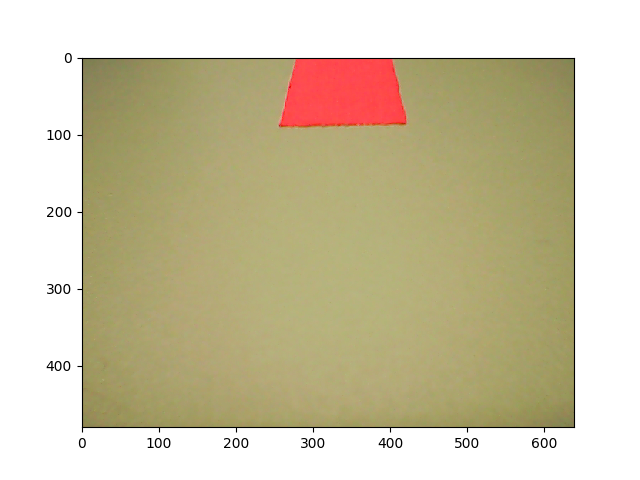

In [1]:
import numpy as np
import cv2
%matplotlib notebook
import matplotlib.pyplot as plt

#import mylib		#sucht mylib.py und führt es aus
#die Suche wird durchgeführt in:
#import sys
#sys.path



video_capture = cv2.VideoCapture(0)         # -1: zufällige Kamera auswählen 
#video_capture.set(3, 640)                    # Breite des Bildes festlegen
#video_capture.set(4, 480)                    # Höhe des Bildes festlegen


ret, frame = video_capture.read()        # Video capturen

img_rgb = frame[:, :, ::-1]             # richtige Farbdarstellung

#crop_img = frame[240:480,0:640]

hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_pink = np.array([170,50,50])                      
upper_pink = np.array([180,255,255])
    
mask = cv2.inRange(hsv_img, lower_pink, upper_pink)

#contours = cv2.findContours(mask, 1, cv2.CHAIN_APPROX_NONE)

#testarray = contours[1]                  # findContours gibt ein Tuple aus, diese Zeile schneidet alle Metadaten aus dem Tupel heraus, sodass nur die reinen Koordinaten der Flächen übrig bleiben  

#print(testarray)

#test = np.array([[[0,0]], [[10,0]], [[10,10]], [[0,10]]])

#key = cv2.contourArea(contours)

#print(key)

zeile100 = mask[100, :]

x = np.arange( zeile100.shape[0] ) #x=0,1,2 ... N-1 (N=Bildbreite)
point_of_gravity = (zeile100*x).sum() / zeile100.sum()


if point_of_gravity <= 240:                                       # Auto positionieren (Linkskurve, Rechtskurve, Geradeausfahrt)
    print("Linkskurve gebraucht!")
        
if point_of_gravity < 400 and point_of_gravity > 240:
    print("Geradeausfahren!")
        
if point_of_gravity >= 400:
    print("Rechtskurve gebraucht!")
    
else:
    print("Keine Linie gefunden.")



plt.figure()
#y = np.arange( mask.shape[0] ) #y=0,1,2 ... N-1 (N=Bildhöhe)
#plt.imshow(img_redness, cmap='gray')
plt.imshow(img_rgb)
#plt.plot(points_of_gravity, y, '.', color='red')


#!!! Der nächste Schritt ist: den längsten Eintrag aus dem beschnittenen contours-Array herausfiltern und diesen direkt in die cv2.moments() geben